In [1]:
# Домашнее задание
# датасет будем присылать

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
# 1) настроить алгоритм, чтобы суммарная ошибка была меньше 0.780593173587177
# 2) добавить свой алгоритм из scikit-learn
# 3) pdf/html -> в опросник

# все должно работать
# все пункты должны быть выполнены

# оформление
# комментарии
# выводы

# дедлайн: 12:00 МСК 14.08.2019

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
money = pd.read_csv("money.csv")

# merge dataframes: money[new_col] = ...

In [4]:
#money.head(5) # head -> выводит указанное число строк

In [5]:
# Определение интервалов
# Глубина в прошлое ( дней * недель)
past = 7 * 4
# Глубина в будущее (дней * недель)
future = 7 * 1

In [6]:
# len -> length -> длина
# Проверка, что датасет подгрузился в нужном объеме
print("В датасете {} строк".format(len(money)))

В датасете 357 строк


In [7]:
df = list()
values = money["value"]

for i in range(past, len(money) - future):
    part_of_values = values[(i-past):(i+future)]
    df.append(list(part_of_values))

In [8]:
past_columns = [f"past_{i + 1}" for i in range(past)]
future_columns = [f"future_{i + 1}" for i in range(future)]

In [9]:
#Заполнение датафрейма данными
df = pd.DataFrame(df, columns=(past_columns + future_columns))

In [10]:
#df.head(5)

In [11]:
X = df[past_columns][0:-1] # прошлое + строки за исключением последней
Y = df[future_columns][0:-1] # будущее + строки за исключением последней

In [12]:
X_test = df[past_columns][-1:]
Y_test = df[future_columns][-1:]

In [13]:
# Словарь для хранения всех результатов
results = {}

In [14]:
# Функция добавления к общим результатам, если ошибка меньше 2
def addToResult(name, prediction, norm_error=0):
    if norm_error < 2:
        results[name] = [prediction, norm_error]

In [15]:
# Выбор лучшего результата
def chooseBestResult():
    min = ['default', 1000]
    for method in results:
        if results[method][1] < min[1]:
            min[0] = method
            min[1] = results[method][1]
    print(f'Лучший результат: {min[0]} с ошибкой {min[1]}')

In [16]:
# Отображение общих результатов
def showOverallResults():
    print('Графики предполагаемых значений с ошибкой менее 2')
    plt.figure(figsize = [12, 9])
    for method in results:
        lbl = method +':'+ str(round(results[method][1], 4))
        plt.plot(results[method][0], label=lbl) # label <- легенда
    plt.plot(df[future_columns].iloc[-1], label="Факт") 
    plt.legend()

In [17]:
def showResults(name, df, prediction, Y_test):
    print('Предположение:')
    print(prediction)
    print('Фактические данные:')
    print(Y_test)
    print('Нормализованная ошибка:')
    norm_error = np.linalg.norm(prediction - Y_test)
    print(norm_error)
    plt.plot(prediction, label="Предположение") # label <- легенда
    plt.plot(df[future_columns].iloc[-1], label="Факт") # iloc <- вытаскивает элемент на указанной позиции
    plt.legend() # <- отрисовывает окошко с легендами
    addToResult(name, prediction, norm_error)

Предположение:
[65.01983218 64.9241458  64.88399836 64.85890282 64.86547712 64.83118503
 64.82545407]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
1.3133976070933888


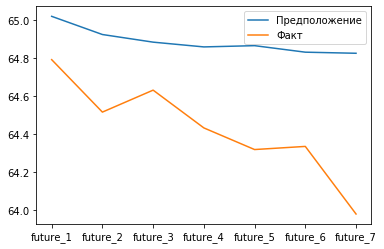

In [18]:
# ------------------
# Линейная регрессия
# ------------------
from sklearn.linear_model import LinearRegression
# Обучение
reg = LinearRegression().fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults('Линейная регрессия',df, prediction, Y_test)

Предположение:
[65.21936 65.16716 64.89924 64.66956 64.55446 64.50084 64.4225 ]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
1.0070934443238118


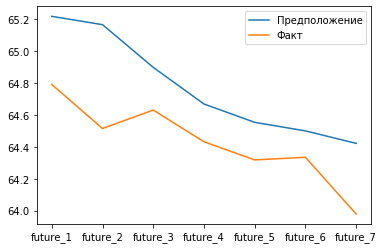

In [19]:
# ------------------
# Метод ближаших соседей
# ------------------
from sklearn.neighbors import KNeighborsRegressor
# Параметры
n_of_neighbors = 5 # число соседей
# Обучение
reg = KNeighborsRegressor(n_neighbors=n_of_neighbors).fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults(f'Ближайшие соседи {n_of_neighbors}шт.', df, prediction, Y_test)

Предположение:
[64.56553676 64.57015297 64.57608652 64.58314057 64.59003024 64.59522758
 64.60243664]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
0.7805931735871656


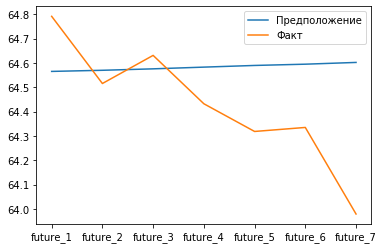

In [20]:
# ------------------
# Метод Лассо LARS
# ------------------
from sklearn import linear_model
# Параметры
alpha_param = 0.1 # Альфа-параметр
# Обучение
reg = linear_model.LassoLars(alpha=alpha_param).fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults('LassoLARS', df, prediction, Y_test)

Предположение:
[65.00012766 64.95152814 64.91905838 64.84805096 64.86213065 64.85604413
 64.83881343]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
1.3393101017685447


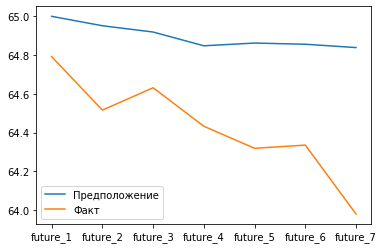

In [21]:
# ------------------
# Метод Лассо
# ------------------
from sklearn import linear_model
# Параметры
alpha_param = 0.005 # Альфа-параметр
# Обучение
reg = linear_model.Lasso(alpha=alpha_param, normalize=False, random_state= 20).fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults('Lasso', df, prediction, Y_test)

Предположение:
[64.9722568  64.64064943 65.18565553 65.59226372 64.34972083 64.12408731
 64.71292486]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
1.5111997468851825


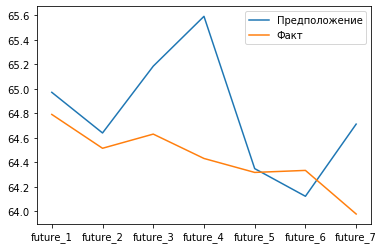

In [22]:
# ------------------
# Нейронная сеть / Параметры по-умолчанию
# ------------------
from sklearn import neural_network
# Параметры

# Обучение
reg = neural_network.MLPRegressor()
reg = reg.fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults('НС-default', df, prediction, Y_test)


Предположение:
[65.01753956 64.92556198 64.89042951 64.85376146 64.86600291 64.82873022
 64.82850053]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
1.3142966229870898


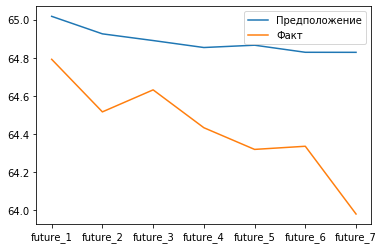

In [23]:
# ------------------
# Нейронная сеть / Гипотеза 1 - увеличение hls, итераций, алгоритм 
# ------------------
from sklearn import neural_network
# Параметры
hls = 500 # Hidden layer sizes
slvr = 'lbfgs' # Алгоритм -> For small datasets, however, ‘lbfgs’ can converge faster and perform better.
iter = 5000 # Кол-во итераций
# Обучение
reg = neural_network.MLPRegressor(hidden_layer_sizes=hls, solver = slvr, max_iter = iter)
reg = reg.fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults('НС - №1',df, prediction, Y_test)


Предположение:
[65.03924634 64.79887244 64.74869622 64.73739769 64.70909419 64.6583932
 64.67405666]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
0.9936697591594772


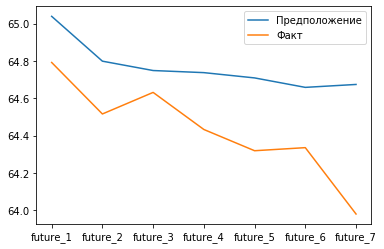

In [24]:
# ------------------
# Нейронная сеть / Гипотеза 2 - увеличение hls и итераций по сравнению с Гипотезой 1
# ------------------
from sklearn import neural_network
# Параметры
hls = 750 # Hidden layer sizes
slvr = 'lbfgs' # Алгоритм
iter = 10000 # Кол-во итераций
# Обучение
reg = neural_network.MLPRegressor(hidden_layer_sizes=hls, solver = slvr, max_iter = iter)
reg = reg.fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults('НС - №2', df, prediction, Y_test)


Предположение:
[65.04972212 64.83362192 64.82092409 64.76078954 64.75638545 64.7476003
 64.68529426]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
1.0821460383237995


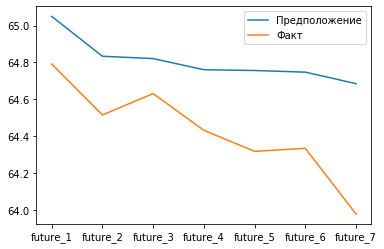

In [25]:
# ------------------
# Нейронная сеть / Гипотеза 2.2 - изменения параметров
# ------------------
from sklearn import neural_network
# Параметры
hls = 750 # Hidden layer sizes
slvr = 'lbfgs' # Алгоритм
iter = 10000 # Кол-во итераций
# Обучение
reg = neural_network.MLPRegressor(hidden_layer_sizes=hls, solver = slvr, max_iter = iter)
reg = reg.fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults('НС - №2.2', df, prediction, Y_test)


Предположение:
[65.27660106 65.1845873  65.28967538 65.39022846 65.41627444 65.52891635
 65.43321157]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
2.6030341425894368


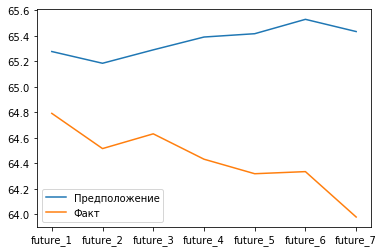

In [26]:
# ------------------
# Нейронная сеть / Гипотеза 3 - Гипотеза 2, смена алгоритма на adam, изменение параметров
# ------------------
from sklearn import neural_network
# Параметры
hls = 750 # Hidden layer sizes
slvr = 'adam' # Алгоритм
iter = 10000 # Кол-во итераций
# Обучение
reg = neural_network.MLPRegressor(hidden_layer_sizes=hls, solver = slvr, max_iter = iter)
reg = reg.fit(X, Y)
# Предположение
prediction = reg.predict(X_test)[0]
# Вывод результатов
showResults('НС - №3', df, prediction, Y_test)


Предположение:
[65.27660106 65.1845873  65.28967538 65.39022846 65.41627444 65.52891635
 65.43321157]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
321   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
2.6030341425894368


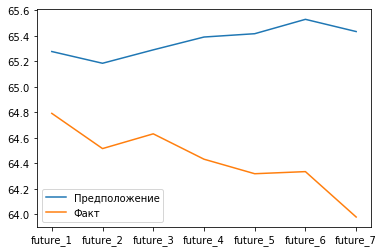

In [27]:
# ------------------
# Нейронная сеть / Гипотеза 4 - Гипотеза 2, смена алгоритма на sgd
# ------------------
from sklearn import neural_network
# Параметры
hls = 750 # Hidden layer sizes
slvr = 'sgd' # Алгоритм
iter = 10000 # Кол-во итераций
# Обучение
reg = neural_network.MLPRegressor(hidden_layer_sizes=hls, solver = slvr, max_iter = iter)
reg = reg.fit(X, Y)
# Предположение
#prediction = reg.predict(X_test)[0]
#Вывод результатов
showResults('НС - №4',df, prediction, Y_test)


In [28]:
# -----------------------------
# ------ УВЕЛИЧЕНИЕ ИНТЕРВАЛА ОБУЧЕНИЯ В 3 РАЗА
# Определение интервалов
# Глубина в прошлое ( дней * недель)
past2 = 7 * 12
# Глубина в будущее (дней * недель)
future = 7 * 1

In [29]:
df2 = list()
values = money["value"]

for i in range(past2, len(money) - future):
    part_of_values = values[(i-past2):(i+future)]
    df2.append(list(part_of_values))

In [30]:
past_columns2 = [f"past_{i + 1}" for i in range(past2)]
future_columns = [f"future_{i + 1}" for i in range(future)]

In [31]:
#Заполнение датафрейма данными
df2 = pd.DataFrame(df2, columns=(past_columns2 + future_columns))

In [32]:
#df2.head(5)

In [33]:
X2 = df2[past_columns2][0:-1] # прошлое + строки за исключением последней
Y = df2[future_columns][0:-1] # будущее + строки за исключением последней

In [34]:
X2_test = df2[past_columns2][-1:]
Y_test = df2[future_columns][-1:]

Предположение:
[64.93027676 64.94040914 64.73899636 64.90156883 64.69723838 65.13025704
 64.797054  ]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
265   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
1.3692753064748462


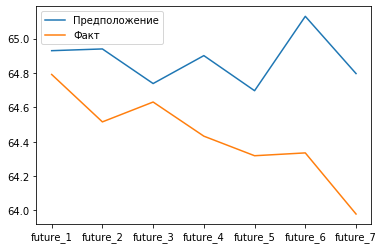

In [35]:
# ------------------
# Нейронная сеть / Увеличение числа данных, изменение алгоритма
# ------------------
from sklearn import neural_network
# Параметры
hls = 10000 # Hidden layer sizes
slvr = 'adam' # Алгоритм
iter = 100000 # Кол-во итераций
lri = 0.0001 # learning rate init
# Обучение
reg = neural_network.MLPRegressor(hidden_layer_sizes=hls, solver = slvr, max_iter = iter, learning_rate_init= lri)
reg = reg.fit(X2, Y)
# Предположение
prediction = reg.predict(X2_test)[0]
# Вывод результатов
showResults('НС-увел.данных ADAM',df, prediction, Y_test)


Предположение:
[64.9702693  64.69647298 64.78558457 64.74905189 64.30523287 64.18213197
 64.29389057]
Фактические данные:
     future_1  future_2  future_3  future_4  future_5  future_6  future_7
265   64.7919   64.5158   64.6314   64.4326   64.3187   64.3352   63.9794
Нормализованная ошибка:
0.5575737803472339


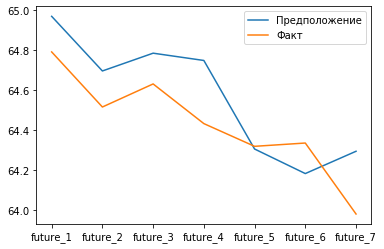

In [41]:
# ------------------
# Нейронная сеть / Гипотеза 2.3 - Увеличение числа исходных данных 
# ------------------
from sklearn import neural_network
# Параметры
hls = 750 # Hidden layer sizes
slvr = 'lbfgs' # Алгоритм
iter = 10000 # Кол-во итераций
# Обучение
reg = neural_network.MLPRegressor(hidden_layer_sizes=hls, solver = slvr, max_iter = iter)
reg = reg.fit(X2, Y)
# Предположение
prediction = reg.predict(X2_test)[0]
# Вывод результатов
showResults('НС-увел.данных LBFGS',df, prediction, Y_test)


Графики предполагаемых значений с ошибкой менее 2
Лучший результат: НС-увел.данных LBFGS с ошибкой 0.5575737803472339


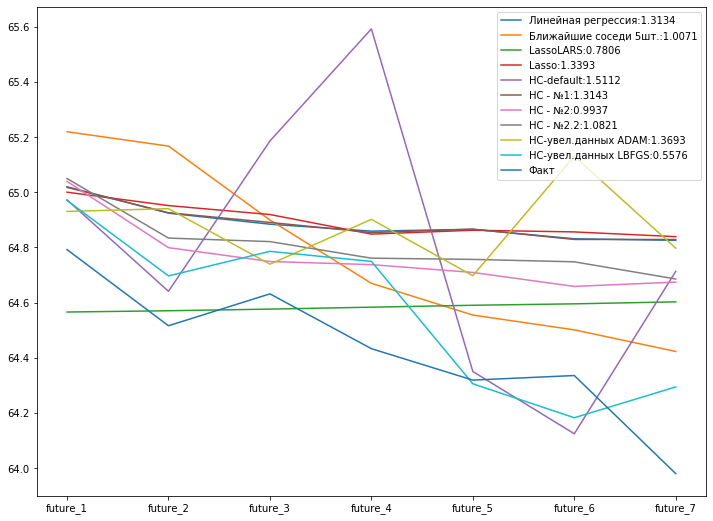

In [42]:
showOverallResults()
chooseBestResult()